In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 1. Load the datasets
hist_df = pd.read_csv('historical_data.csv')
fg_df = pd.read_csv('fear_greed_index.csv')

In [29]:
# Objective 1: Data Integration and Preparation

# Convert 'Timestamp IST' to a standard date format (YYYY-MM-DD)
hist_df['date'] = pd.to_datetime(hist_df['Timestamp IST'], dayfirst=True).dt.strftime('%Y-%m-%d')

In [19]:
# Convert Fear & Greed Index date to the same format
fg_df['date'] = pd.to_datetime(fg_df['date']).dt.strftime('%Y-%m-%d')

In [20]:
# Merge the datasets on the 'date' column
merged_df = pd.merge(hist_df, fg_df, on='date', how='inner')

In [22]:
# Objective 2: Performance Analysis by Sentiment

# Calculate Profitability (PnL) metrics by Sentiment Classification
pnl_stats = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'sum', 'count']).reset_index()
pnl_stats = pnl_stats.sort_values(by='mean', ascending=False)

In [23]:
# Calculate Volume (Size USD) metrics by Sentiment Classification
volume_stats = merged_df.groupby('classification')['Size USD'].agg(['mean', 'sum']).reset_index()

print("--- Profitability by Sentiment ---")
print(pnl_stats)

--- Profitability by Sentiment ---
  classification       mean           sum  count
1  Extreme Greed  67.892861  2.715171e+06  39992
2           Fear  54.290400  3.357155e+06  61837
3          Greed  42.743559  2.150129e+06  50303
0   Extreme Fear  34.537862  7.391102e+05  21400
4        Neutral  34.307718  1.292921e+06  37686


In [24]:
# Objective 3: Behavioral Pattern Recognition

# Analyze Trade Side (BUY vs SELL) distribution across sentiments
side_distribution = pd.crosstab(merged_df['classification'], merged_df['Side'], normalize='index') * 100

print("\n--- Trade Side Distribution (%) ---")
print(side_distribution)


--- Trade Side Distribution (%) ---
Side                  BUY       SELL
classification                      
Extreme Fear    51.098131  48.901869
Extreme Greed   44.858972  55.141028
Fear            48.951275  51.048725
Greed           48.855933  51.144067
Neutral         50.334342  49.665658


/tmp/ipython-input-480276650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_stats, x='classification', y='mean', palette='viridis')


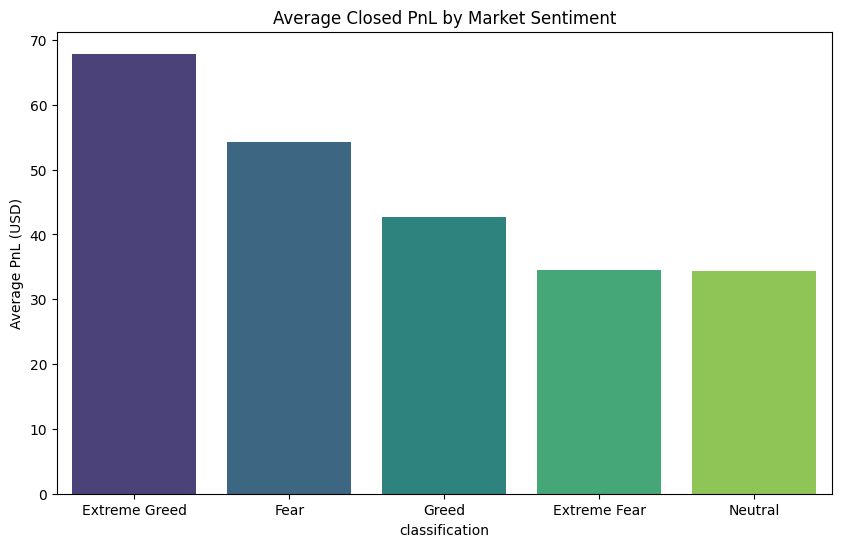

In [25]:
# Visualization

# Plot 1: Average PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=pnl_stats, x='classification', y='mean', palette='viridis')
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Average PnL (USD)')
plt.savefig('pnl_by_sentiment.png')

/tmp/ipython-input-1350425008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=volume_stats, x='classification', y='sum', palette='magma')


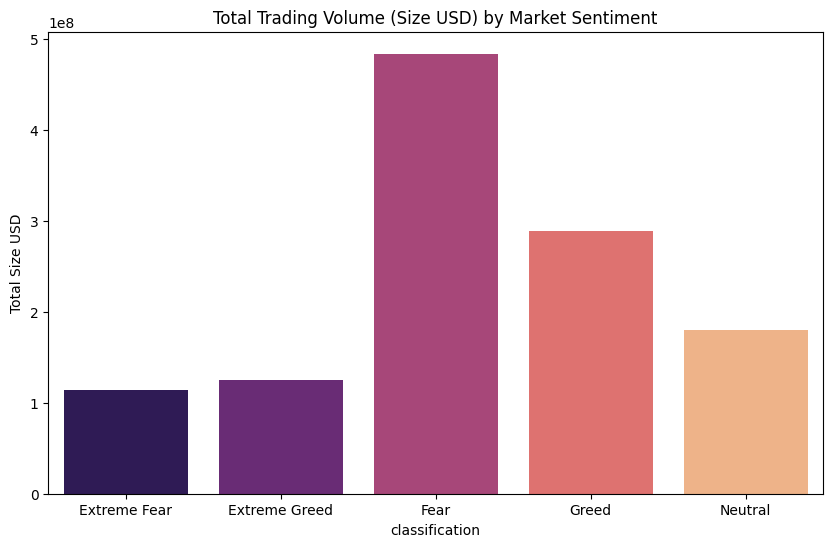

In [26]:
# Plot 2: Total Trading Volume by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=volume_stats, x='classification', y='sum', palette='magma')
plt.title('Total Trading Volume (Size USD) by Market Sentiment')
plt.ylabel('Total Size USD')
plt.savefig('volume_by_sentiment.png')

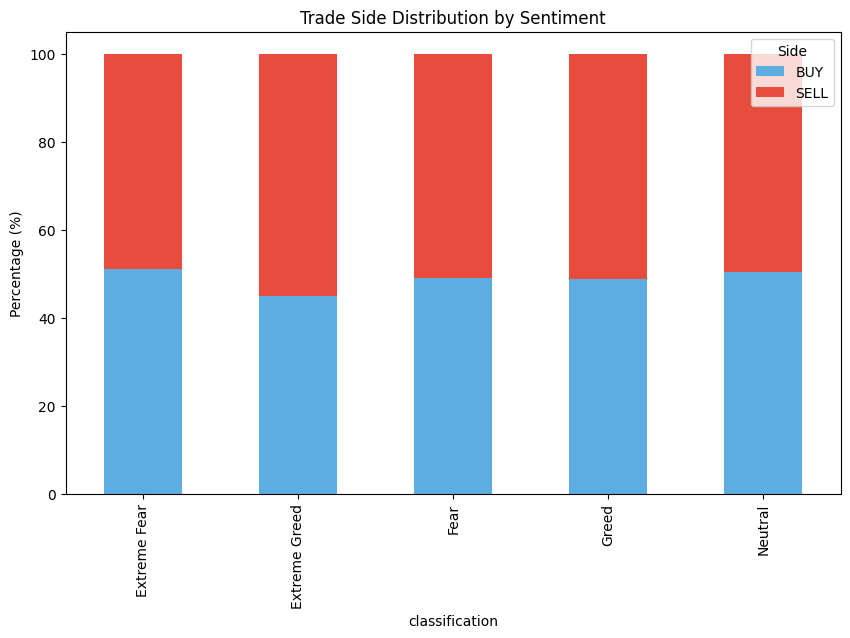

In [27]:
# Plot 3: Side Distribution
side_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5DADE2', '#E74C3C'])
plt.title('Trade Side Distribution by Sentiment')
plt.ylabel('Percentage (%)')
plt.legend(title='Side', loc='upper right')
plt.savefig('side_distribution.png')

In [28]:
# Objective 4: Strategy Insights
# Derive insights based on the analysis
def get_insights():
    best_sentiment = pnl_stats.iloc[0]['classification']
    sell_bias = side_distribution.loc['Extreme Greed', 'SELL']

    print("\n--- Key Strategy Insights ---")
    print(f"1. Most Profitable Sentiment: Traders performed best during '{best_sentiment}' phases.")
    print(f"2. Profit Taking: During 'Extreme Greed', SELL orders increase to {sell_bias:.2f}%, indicating a tendency to take profits.")
    print(f"3. Risk Appetite: Total volume is highest during 'Fear', suggesting traders are more active or reactive during market dips.")

get_insights()


--- Key Strategy Insights ---
1. Most Profitable Sentiment: Traders performed best during 'Extreme Greed' phases.
2. Profit Taking: During 'Extreme Greed', SELL orders increase to 55.14%, indicating a tendency to take profits.
3. Risk Appetite: Total volume is highest during 'Fear', suggesting traders are more active or reactive during market dips.
